<a href="https://colab.research.google.com/github/AdindaRahajengSilviaPranesti/MachineLearning_Quiz/blob/main/Group_2_Machine_Learning_Quiz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 2
- Adinda Rahajeng Silvia Pranesti/02/2141720158
- Faizal Leviansyah/05/21u41720246
- Khafilla Akbar Syahputra/11/2141720152
- Muhammad Adhika Isa Nugraha/13/2141720267
- Muhammad Fahmi Huwaidi/16/2141720153


# Case Study - Handwritten Classification Using MNIST Data

## General Description
You are requested to perform classification using the Naive Bayes and SVM algorithms to recognize handwritten digits from the MNIST dataset.

## About MNIST Dataset

The MNIST (Modified National Institute of Standards and Technology) dataset is a collection of grayscale images sized 28x28 pixels, containing handwritten digits ranging from 0 to 9. The dataset comprises a total of 70,000 handwritten images.

## Tasks

1. Ensure the number of data points for each digit label (0-9). Is there any data imbalance in the MNIST dataset being used? Explain your group's answer and provide evidence!

2. Display the first 15 images from the MNIST dataset along with their labels. You can refer to Job Sheet 03 for guidance.

3. Perform feature extraction on the MNIST data. In this process, you are allowed to:
   - Use the original pixel values of the images as features.
   - Perform other feature extraction methods such as histograms, PCA, or others. You are allowed to explore this process.

4. Create training and testing data using ratios of 70:30, 80:20, and 90:10.

5. Conduct classification using the Naive Bayes and SVM algorithms.
   - You are allowed to tune parameters.
   - You are allowed to explore different types of kernels for SVM.

6. Evaluate the models you have created on both the training and testing data.
   - Use the *accuracy* metric to assess the accuracy on training and testing data.
   - Utilize the *classification_report* function to understand the model's overall performance.
   - Use a confusion matrix to determine the accuracy of labeling.

7. Display the testing data images along with their predicted labels. You can use Job Sheet 03 as a reference.

8. What is the best model you obtained? What is its configuration? What level of accuracy did you achieve? Explain!

Please note that this appears to be a set of instructions for a machine learning project using the MNIST dataset. You would need to follow these steps, perform the necessary coding and analysis, and then provide your findings and results.

# Helper

Here is the code snippet to help you download the MNIST dataset

In [14]:
# Download MNIST Dataset
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [15]:
# Please read MNIST dataset description
# It may help you to understand the dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [16]:
# Inpsect dataset keys
# It may help you to understand the dataset structure
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [17]:
print(mnist.data)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel7

1. Ensure the number of data points for each digit label (0-9). Is there any data imbalance in the MNIST dataset being used? Explain your group's answer and provide evidence!

In [18]:
#importing Library
%pip install torch torchvision numpy matplotlib pandas

import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Download the MNIST dataset using torchvision
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)

In [19]:
# Extracting the data and labels
data = mnist_dataset.data
labels = mnist_dataset.targets

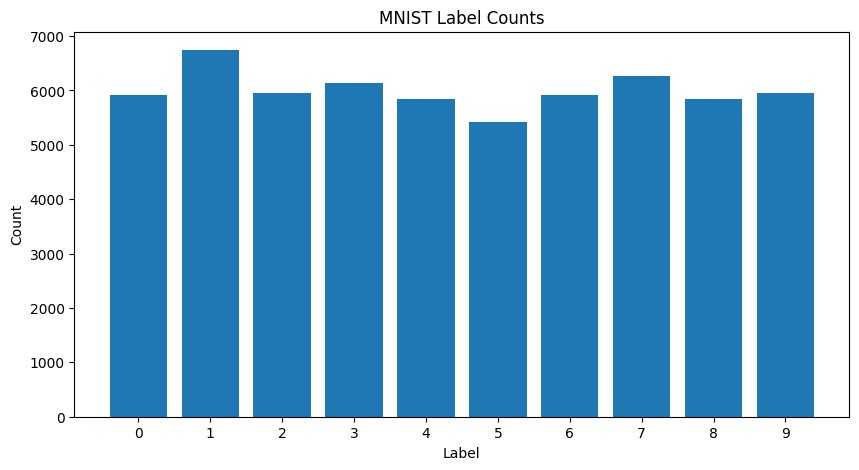

In [20]:
# 1. Counting the size of each label
label_counts = torch.bincount(labels)

fig, ax = plt.subplots(figsize=(10, 5))

# bar function is to create a chart to visualize the label counts
ax.bar(np.arange(10), label_counts)

ax.set_xticks(np.arange(10))
ax.set_xticklabels([str(i) for i in range(10)])

# Set axis labels and title
ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_title('MNIST Label Counts')

plt.show()

2. Display the first 15 images from the MNIST dataset along with their labels. You can refer to Job Sheet 03 for guidance.



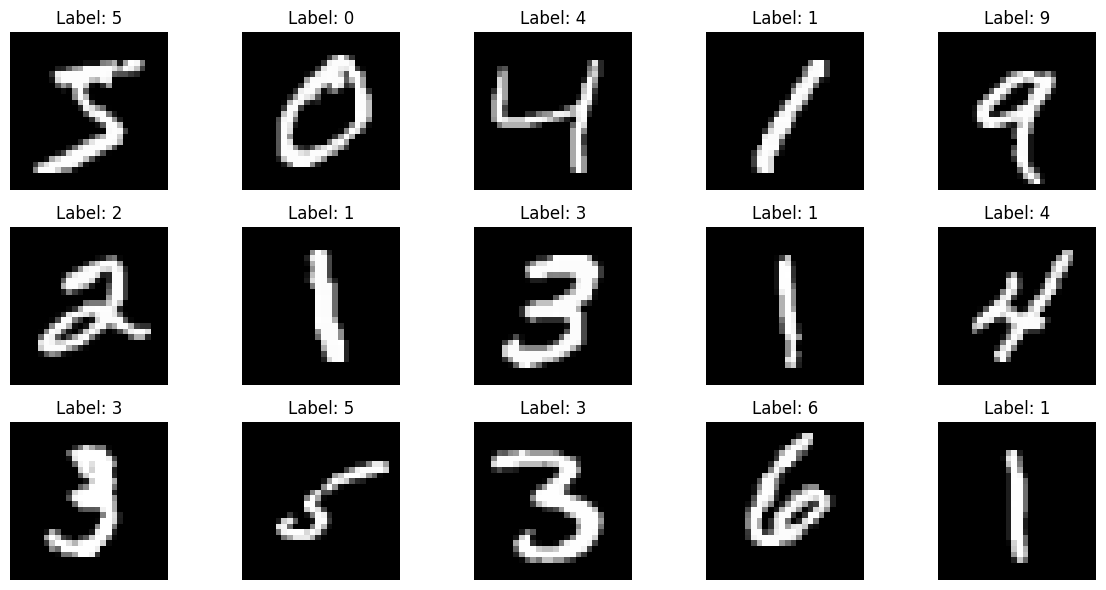

In [21]:
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(data[i], cmap='gray')
    plt.title(f"Label: {labels[i].item()}")
    plt.axis('off')

plt.tight_layout()
plt.show()


3. Perform feature extraction on the MNIST data. In this process, you are allowed to:
   - Use the original pixel values of the images as features.
   - Perform other feature extraction methods such as histograms, PCA, or others. You are allowed to explore this process.

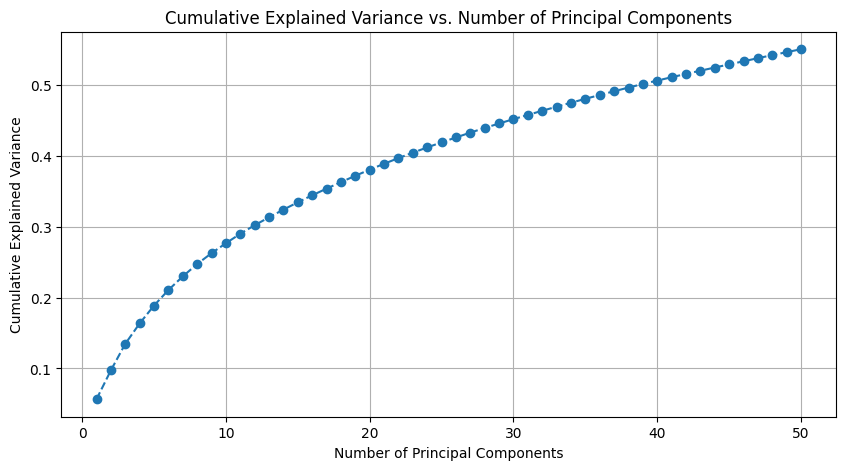

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize and reshape the data
data_std = StandardScaler().fit_transform(data.reshape(data.shape[0], -1))

# Perform PCA with the desired number of components (e.g., 50)
n_components = 50
data_pca = PCA(n_components=n_components).fit_transform(data_std)

# Plot cumulative explained variance ratio
explained_variance_ratio = np.cumsum(PCA(n_components=n_components).fit(data_std).explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, n_components + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid()
plt.show()


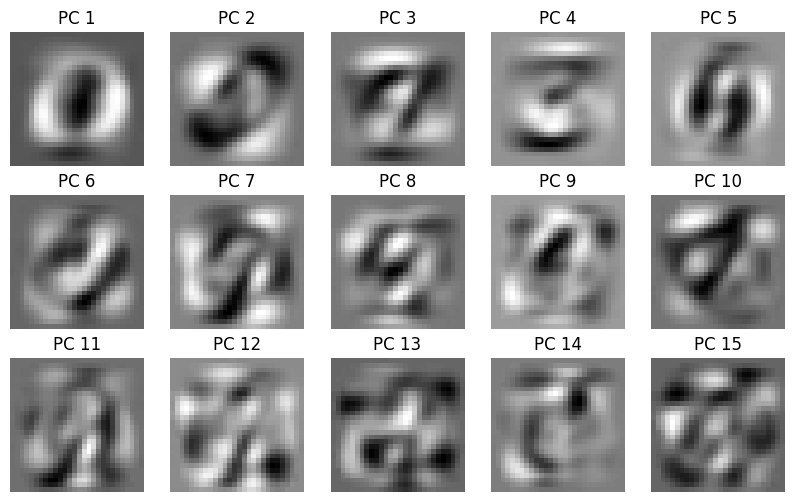

In [27]:
# Visualize the first 15 principal components (eigendigits)
fig, ax = plt.subplots(3, 5, figsize=(10, 6))
for i, axi in enumerate(ax.flat):
    eigendigit = pca.components_[i].reshape(28, 28)
    axi.imshow(eigendigit, cmap='gray')
    axi.set_title(f'PC {i + 1}')
    axi.axis('off')

plt.show()


4. Create training and testing data using ratios of 70:30, 80:20, and 90:10.



In [28]:
from sklearn.model_selection import train_test_split

# Split data into multiple test sizes
test_sizes = [0.3, 0.2, 0.1]

for i, test_size in enumerate(test_sizes):
    X_train, X_test, y_train, y_test = train_test_split(
        data_pca, labels, test_size=test_size, random_state=42)

    print(f"Test {i + 1} - Test size: {test_size}")
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_test shape: {y_test.shape}")
    print()


Test 1 - Test size: 0.3
X_train shape: (42000, 50)
y_train shape: torch.Size([42000])
X_test shape: (18000, 50)
y_test shape: torch.Size([18000])

Test 2 - Test size: 0.2
X_train shape: (48000, 50)
y_train shape: torch.Size([48000])
X_test shape: (12000, 50)
y_test shape: torch.Size([12000])

Test 3 - Test size: 0.1
X_train shape: (54000, 50)
y_train shape: torch.Size([54000])
X_test shape: (6000, 50)
y_test shape: torch.Size([6000])



5. Conduct classification using the Naive Bayes and SVM algorithms.
   - You are allowed to tune parameters.
   - You are allowed to explore different types of kernels for SVM.



6. Evaluate the models you have created on both the training and testing data.
   - Use the *accuracy* metric to assess the accuracy on training and testing data.
   - Utilize the *classification_report* function to understand the model's overall performance.
   - Use a confusion matrix to determine the accuracy of labeling.



7. Display the testing data images along with their predicted labels. You can use Job Sheet 03 as a reference.


8. What is the best model you obtained? What is its configuration? What level of accuracy did you achieve? Explain!

test 2.1